In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people



In [ ]:
data = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X = data.images
y = data.target


X = X / 255.0
X = np.expand_dims(X, -1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(np.unique(y)), activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.3659 - loss: 1.8575 - val_accuracy: 0.4612 - val_loss: 1.6031
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4200 - loss: 1.6882 - val_accuracy: 0.4612 - val_loss: 1.6050
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3991 - loss: 1.7007 - val_accuracy: 0.4612 - val_loss: 1.6239
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3997 - loss: 1.7080 - val_accuracy: 0.4612 - val_loss: 1.6359
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4310 - loss: 1.6681 - val_accuracy: 0.4612 - val_loss: 1.6097
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3975 - loss: 1.7154 - val_accuracy: 0.4612 - val_loss: 1.5926
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3963 - loss: 1.7152 - val_accuracy: 0.4612 - val_loss: 1.6247
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3917 - loss: 1.7262 - val_accuracy: 0.4612 - val_loss

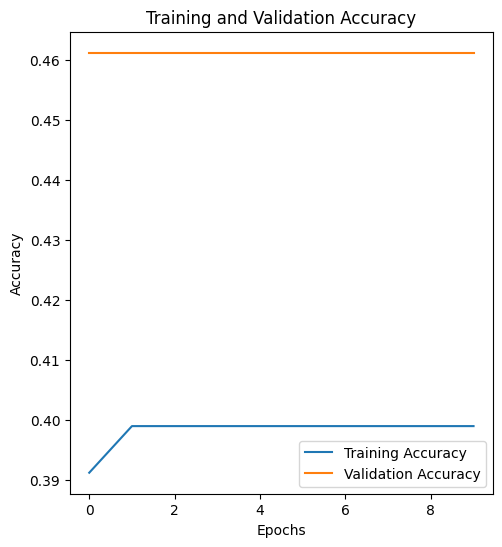

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

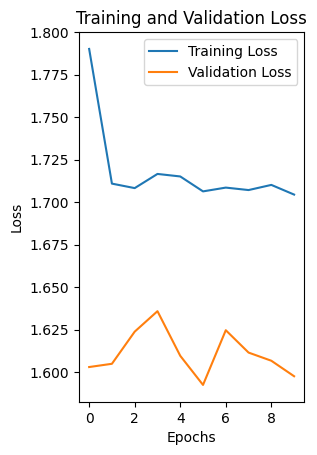

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


model.save('face_recognition_model.keras')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5007 - loss: 1.5370 
Test accuracy: 46.12%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


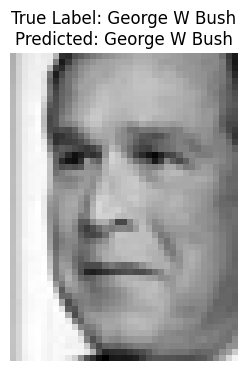

In [ ]:
sample_idx = np.random.choice(len(X_test))
sample_image = X_test[sample_idx]
sample_label = y_test[sample_idx]
sample_prediction = model.predict(np.expand_dims(sample_image, axis=0))


plt.figure(figsize=(4, 4))
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"True Label: {data.target_names[sample_label]}\nPredicted: {data.target_names[np.argmax(sample_prediction)]}")
plt.axis('off')
plt.show()